## Calculating new dependent and independent variables, and modelling

In [1]:
import pandas as pd
import numpy as np

FILE_PATH = r"../generated_data/cp3_modelling/"

In [2]:
df_epi = pd.read_csv(FILE_PATH+"epidemiology_subset.csv")
df_search_trends = pd.read_csv(FILE_PATH+"google-search-trends_subset.csv")
df_gvt_resp = pd.read_csv(FILE_PATH+"government_response_subset.csv")
df_mobility = pd.read_csv(FILE_PATH+"mobility_subset.csv")
df_vacc_search = pd.read_csv(FILE_PATH+"vaccination_search_subset.csv")
df_vacc = pd.read_csv(FILE_PATH+"vaccinations_subset.csv")

df_index = pd.read_csv(r"../datasets/index.csv")
df_demographics = pd.read_csv(r"../datasets/demographics.csv")

### Part 3: Which approach was more effective - Direct Response

*Direct Response: Whether people actually followed/cared about the restrictions/strictness*

Indepenent variable 1 (direct response) - a combined figure that we get from compiling the direct and indirect responses- level of mobility (add the 6 - to get net change), number of new vaccinations, frequency of searches (add the covid-related ones - consolidated frequency indication) (try logging)


Dependent variables - the reduced govt response dataset

In [3]:
df_vacc.head()

,Unnamed: 0,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,402023,2021-01-10,GB,NaN,2286572.0,NaN,391399.0,NaN,2677971.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,402024,2021-01-11,GB,145076.0,2431648.0,20768.0,412167.0,165844.0,2843815.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,402025,2021-01-12,GB,207661.0,2639309.0,16065.0,428232.0,223726.0,3067541.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,402026,2021-01-13,GB,278943.0,2918252.0,9745.0,437977.0,288688.0,3356229.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,402027,2021-01-14,GB,316694.0,3234946.0,5257.0,443234.0,321951.0,3678180.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_vacc_gb = df_vacc.loc[df_vacc['location_key'] == "GB"]
df_vacc_id = df_vacc.loc[df_vacc['location_key'] == "ID"]
df_vacc_sg = df_vacc.loc[df_vacc['location_key'] == "SG"]

In [5]:
df_vacc_gb['perc_new_vacc'] = df_vacc_gb['new_persons_vaccinated']/max(df_vacc_gb['new_persons_vaccinated'].dropna())
df_vacc_id['perc_new_vacc'] = df_vacc_id['new_persons_vaccinated']/max(df_vacc_id['new_persons_vaccinated'].dropna())
df_vacc_sg['perc_new_vacc'] = df_vacc_sg['new_persons_vaccinated']/max(df_vacc_sg['new_persons_vaccinated'].dropna())

df_vacc_id.head()

c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Unnamed: 0,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,...,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac,perc_new_vacc
606,412480,2021-01-12,ID,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,412481,2021-01-22,ID,132000.0,132000.0,NaN,NaN,132000.0,132000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032676
608,412482,2021-01-24,ID,17242.0,149242.0,NaN,NaN,17242.0,149242.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004268
609,412483,2021-01-25,ID,12717.0,161959.0,NaN,NaN,12717.0,161959.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003148
610,412484,2021-01-26,ID,83726.0,245685.0,NaN,NaN,83726.0,245685.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020726


Variables to select: perc_new_vacc - the number of new vaccinations as a percentage of the maximum

In [6]:
df_search_trends.head()

,Unnamed: 0,search_trends_fever,search_trends_low_grade_fever,search_trends_chills,search_trends_cough,search_trends_shallow_breathing,search_trends_shortness_of_breath,search_trends_fatigue,search_trends_muscle_weakness,search_trends_cluster_headache,search_trends_headache,search_trends_sore_throat,search_trends_nasal_congestion,search_trends_nausea,search_trends_vomiting,search_trends_diarrhea,date,location_key
0,8874,4.07,0.11,0.32,9.27,0.05,1.03,6.26,0.16,0.22,5.37,3.28,2.48,2.37,4.85,5.24,2020-01-01,GB
1,8875,3.94,0.06,0.31,10.01,0.05,1.12,6.96,0.18,0.28,4.86,3.57,2.35,2.26,4.30,5.41,2020-01-02,GB
2,8876,3.80,0.06,0.31,9.77,0.09,1.02,6.77,0.18,0.24,4.59,3.32,2.50,2.22,3.96,5.16,2020-01-03,GB
3,8877,3.93,0.07,0.27,9.63,0.07,1.06,6.60,0.21,0.29,4.94,3.17,2.41,2.27,3.86,4.99,2020-01-04,GB
4,8878,3.90,0.06,0.25,9.64,0.10,1.15,7.69,0.20,0.23,5.16,3.39,2.27,2.40,4.09,5.16,2020-01-05,GB


In [7]:
df_search_trends_gb = df_search_trends.loc[df_search_trends['location_key'] == "GB"]
df_search_trends_id = df_search_trends.loc[df_search_trends['location_key'] == "ID"]
df_search_trends_sg = df_search_trends.loc[df_search_trends['location_key'] == "SG"]

In [8]:
df_search_trends_gb['covid_search_freq'] = df_search_trends_gb.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')/100
df_search_trends_id['covid_search_freq'] = df_search_trends_id.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')/100
df_search_trends_sg['covid_search_freq'] = df_search_trends_sg.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')/100

df_search_trends_sg.head()

c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,search_trends_fever,search_trends_low_grade_fever,search_trends_chills,search_trends_cough,search_trends_shallow_breathing,search_trends_shortness_of_breath,search_trends_fatigue,search_trends_muscle_weakness,search_trends_cluster_headache,search_trends_headache,search_trends_sore_throat,search_trends_nasal_congestion,search_trends_nausea,search_trends_vomiting,search_trends_diarrhea,date,location_key,covid_search_freq
986,11832,7.93,0.40,0.38,10.08,0.06,0.86,5.61,0.22,0.16,4.70,2.92,2.63,2.37,3.62,5.28,2020-01-01,SG,0.4722
987,11833,7.95,0.48,0.48,13.20,0.08,1.01,6.09,0.23,0.18,4.75,3.00,2.50,2.43,3.66,5.18,2020-01-02,SG,0.5122
988,11834,7.67,0.45,0.39,12.22,0.07,0.81,5.61,0.24,0.18,4.34,3.12,2.50,2.19,3.29,4.72,2020-01-03,SG,0.4780
989,11835,7.65,0.46,0.43,16.66,0.05,0.84,5.60,0.20,0.12,4.43,3.04,2.39,2.09,3.21,4.87,2020-01-04,SG,0.5204
990,11836,7.85,0.43,0.42,13.92,0.09,0.94,6.18,0.21,0.14,4.71,2.99,2.44,2.34,3.59,5.18,2020-01-05,SG,0.5143


Variables to select: covid_search_freq - consolidated frequency of these terms as a percentage of all search terms

In [9]:
df_mobility.head()

,Unnamed: 0,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
0,379076,2020-02-15,GB,-12.0,-7.0,-35.0,-12.0,-4.0,2.0
1,379077,2020-02-16,GB,-7.0,-6.0,-28.0,-7.0,-3.0,1.0
2,379078,2020-02-17,GB,10.0,1.0,24.0,-2.0,-14.0,2.0
3,379079,2020-02-18,GB,7.0,-1.0,20.0,-3.0,-14.0,2.0
4,379080,2020-02-19,GB,6.0,-2.0,8.0,-4.0,-14.0,3.0


In [10]:
df_mobility_gb = df_mobility.loc[df_mobility['location_key'] == "GB"]
df_mobility_id = df_mobility.loc[df_mobility['location_key'] == "ID"]
df_mobility_sg = df_mobility.loc[df_mobility['location_key'] == "SG"]

In [11]:
df_mobility_gb['net_mob_change'] = df_mobility_gb.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')
df_mobility_gb['net_mob_change_perc'] = df_mobility_gb['net_mob_change']/min(df_mobility_gb['net_mob_change'])

df_mobility_id['net_mob_change'] = df_mobility_id.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')
df_mobility_id['net_mob_change_perc'] = df_mobility_id['net_mob_change']/min(df_mobility_id['net_mob_change'])

df_mobility_sg['net_mob_change'] = df_mobility_sg.drop(['Unnamed: 0', 'date', 'location_key'], axis=1).sum(axis='columns')
df_mobility_sg['net_mob_change_perc'] = df_mobility_sg['net_mob_change']/min(df_mobility_sg['net_mob_change'])

df_mobility_gb.head()

c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Unnamed: 0,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,net_mob_change,net_mob_change_perc
0,379076,2020-02-15,GB,-12.0,-7.0,-35.0,-12.0,-4.0,2.0,-68.0,0.189944
1,379077,2020-02-16,GB,-7.0,-6.0,-28.0,-7.0,-3.0,1.0,-50.0,0.139665
2,379078,2020-02-17,GB,10.0,1.0,24.0,-2.0,-14.0,2.0,21.0,-0.058659
3,379079,2020-02-18,GB,7.0,-1.0,20.0,-3.0,-14.0,2.0,11.0,-0.030726
4,379080,2020-02-19,GB,6.0,-2.0,8.0,-4.0,-14.0,3.0,-3.0,0.008380


Variables to select: net_mob_change_perc - the net change in movements as a percentage of the largest decrease

In [12]:
# Consolidate variables into 1 df
df_part3_gb = df_vacc_gb[["date", "location_key", "perc_new_vacc"]].merge(df_search_trends_gb[["date", "location_key", "covid_search_freq"]], how = "outer", on = ["date", 'location_key']).merge(df_mobility_gb[["date", "location_key", "net_mob_change_perc"]], how = "outer", on = ["date", 'location_key'])
df_part3_id = df_vacc_id[["date", "location_key", "perc_new_vacc"]].merge(df_search_trends_id[["date", "location_key", "covid_search_freq"]], how = "outer", on = ["date", 'location_key']).merge(df_mobility_id[["date", "location_key", "net_mob_change_perc"]], how = "outer", on = ["date", 'location_key'])
df_part3_sg = df_vacc_sg[["date", "location_key", "perc_new_vacc"]].merge(df_search_trends_sg[["date", "location_key", "covid_search_freq"]], how = "outer", on = ["date", 'location_key']).merge(df_mobility_sg[["date", "location_key", "net_mob_change_perc"]], how = "outer", on = ["date", 'location_key'])

df_part3_gb.head()

,date,location_key,perc_new_vacc,covid_search_freq,net_mob_change_perc
0,2021-01-10,GB,NaN,0.3529,0.536313
1,2021-01-11,GB,0.192841,0.3441,0.539106
2,2021-01-12,GB,0.276032,0.3456,0.519553
3,2021-01-13,GB,0.370783,0.3389,0.600559
4,2021-01-14,GB,0.420963,0.2967,0.614525


In [13]:
# fill NAs with ffill
df_part3_gb = df_part3_gb.interpolate(method = "ffill")
df_part3_gb['independent'] = df_part3_gb.drop(['date', 'location_key'], axis = 1).sum(axis='columns')

df_part3_id = df_part3_id.interpolate(method = "ffill")
df_part3_id['independent'] = df_part3_id.drop(['date', 'location_key'], axis = 1).sum(axis='columns')

df_part3_sg = df_part3_sg.interpolate(method = "ffill")
df_part3_sg['independent'] = df_part3_sg.drop(['date', 'location_key'], axis = 1).sum(axis='columns')

df_part3_gb.head()

,date,location_key,perc_new_vacc,covid_search_freq,net_mob_change_perc,independent
0,2021-01-10,GB,NaN,0.3529,0.536313,0.889213
1,2021-01-11,GB,0.192841,0.3441,0.539106,1.076047
2,2021-01-12,GB,0.276032,0.3456,0.519553,1.141185
3,2021-01-13,GB,0.370783,0.3389,0.600559,1.310242
4,2021-01-14,GB,0.420963,0.2967,0.614525,1.332188


In [14]:
df_gvt_resp.head()

,Unnamed: 0,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy,date,location_key,stringency_index
0,120759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-01,GB,0.0
1,120760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-02,GB,0.0
2,120761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-03,GB,0.0
3,120762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-04,GB,0.0
4,120763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-01-05,GB,0.0


In [15]:
df_gvt_resp_gb = df_gvt_resp.loc[df_gvt_resp['location_key'] == "GB"]
df_gvt_resp_id = df_gvt_resp.loc[df_gvt_resp['location_key'] == "ID"]
df_gvt_resp_sg = df_gvt_resp.loc[df_gvt_resp['location_key'] == "SG"]

In [16]:
df_part3_gb = df_part3_gb[['date', 'location_key', 'independent']].merge(df_gvt_resp_gb.drop(['Unnamed: 0', 'stringency_index'], axis = 1), how = 'inner', on = ['date', 'location_key'])
df_part3_id = df_part3_id[['date', 'location_key', 'independent']].merge(df_gvt_resp_id.drop(['Unnamed: 0', 'stringency_index'], axis = 1), how = 'inner', on = ['date', 'location_key'])
df_part3_sg = df_part3_sg[['date', 'location_key', 'independent']].merge(df_gvt_resp_sg.drop(['Unnamed: 0', 'stringency_index'], axis = 1), how = 'inner', on = ['date', 'location_key'])


df_part3_gb.head()

,date,location_key,independent,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy
0,2021-01-10,GB,0.889213,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0
1,2021-01-11,GB,1.076047,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0
2,2021-01-12,GB,1.141185,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0
3,2021-01-13,GB,1.310242,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0
4,2021-01-14,GB,1.332188,3.0,3.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0


*Direct Response: Whether these actions made an impact on covid deaths*

Independent variable 2 (indirect reponse) - covid deaths
Dependent variables - the reduced govt response dataset

In [17]:
df_epi.head()

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,982706,2020-01-01,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,982707,2020-01-02,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,982708,2020-01-03,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,982709,2020-01-04,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,982710,2020-01-05,GB,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [18]:
df_epi_gb = df_epi.loc[df_epi['location_key'] == "GB"]
df_epi_id = df_epi.loc[df_epi['location_key'] == "ID"]
df_epi_sg = df_epi.loc[df_epi['location_key'] == "SG"]

In [19]:
df_epi_gb['perc_new_deaths'] = df_epi_gb['new_deceased']/max(df_epi_gb['new_deceased'].dropna())
df_epi_id['perc_new_deaths'] = df_epi_id['new_deceased']/max(df_epi_id['new_deceased'].dropna())
df_epi_sg['perc_new_deaths'] = df_epi_sg['new_deceased']/max(df_epi_sg['new_deceased'].dropna())

df_epi_id.head()

c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Tristan\Desktop\Assignments\P4DS\p4ds_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Unnamed: 0,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,perc_new_deaths
987,1187679,2020-01-01,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
988,1187680,2020-01-02,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
989,1187681,2020-01-03,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
990,1187682,2020-01-04,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0
991,1187683,2020-01-05,ID,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0


In [20]:
df_part3_gb = df_part3_gb.merge(df_epi_gb[['date', 'location_key', 'perc_new_deaths']], how = 'inner', on = ['date', 'location_key'])
df_part3_id = df_part3_id.merge(df_epi_id[['date', 'location_key', 'perc_new_deaths']], how = 'inner', on = ['date', 'location_key'])
df_part3_sg = df_part3_sg.merge(df_epi_sg[['date', 'location_key', 'perc_new_deaths']], how = 'inner', on = ['date', 'location_key'])

df_part3_id.head()

,date,location_key,independent,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy,perc_new_deaths
0,2021-01-12,ID,0.460094,2.0,2.0,2.0,4.0,1.0,2.0,2.0,3.0,1.0,2.0,4.0,2.0,0.145964
1,2021-01-22,ID,0.689953,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,0.120831
2,2021-01-24,ID,0.647461,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,0.082649
3,2021-01-25,ID,0.575918,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,0.143548
4,2021-01-26,ID,0.621665,2.0,2.0,2.0,4.0,1.0,1.0,2.0,3.0,1.0,2.0,4.0,2.0,0.162397


In [21]:
df_part3_gb["date"] = pd.to_datetime(df_part3_gb["date"])
df_part3_id["date"] = pd.to_datetime(df_part3_id["date"])
df_part3_sg["date"] = pd.to_datetime(df_part3_sg["date"])

df_part3_gb = df_part3_gb.set_index("date")
df_part3_id = df_part3_id.set_index("date")
df_part3_sg = df_part3_sg.set_index("date")

In [22]:
print(len(df_part3_gb), len(df_part3_id), len(df_part3_sg))

937 889 935


### Train model for part 3

One model for each country

In [23]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## England

In [25]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_gb.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_gb["independent"], 
                                                    test_size = 0.2, random_state =1)

In [27]:
trained_models_gb = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_gb["model"].append(model)
    trained_models_gb["predicted_results"].append(y_pred)
    trained_models_gb["train_score"].append(rmse_t)
    trained_models_gb["test_score"].append(rmse)

In [28]:
for x in range(len(trained_models_gb['model'])):
    print('Training Score for', trained_models_gb['model'][x], ':', trained_models_gb['train_score'][x])
    print('Testing Score for', trained_models_gb['model'][x], ':', trained_models_gb['test_score'][x])

Training Score for LinearRegression() : 0.15524522907976174
Testing Score for LinearRegression() : 0.15513391202187263
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.1427908258199808
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.13863769066751497
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.12037855958459932
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.11931499879826851


### The Linear Regression Model

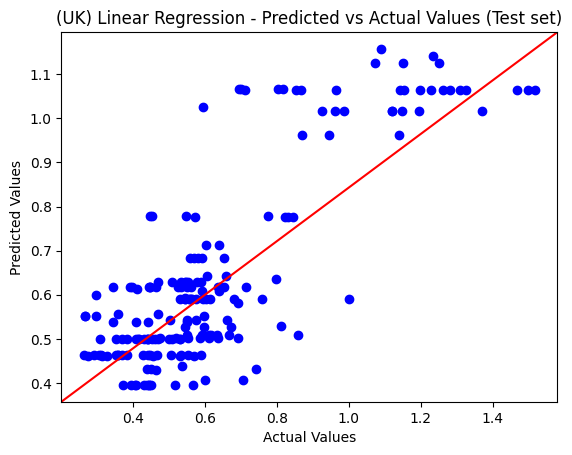

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][0], color = 'blue')
plt.title('(UK) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [30]:
model_coefficients = trained_models_gb["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                   Coef Val  Abs Coef Val
school_closing                    -0.060462      0.060462
workplace_closing                  0.247334      0.247334
cancel_public_events              -0.012264      0.012264
restrictions_on_gatherings        -0.076083      0.076083
public_transport_closing          -0.058986      0.058986
stay_at_home_requirements          0.185776      0.185776
restrictions_on_internal_movement  0.090242      0.090242
international_travel_controls      0.040074      0.040074
income_support                    -0.051672      0.051672
public_information_campaigns      -0.033596      0.033596
facial_coverings                  -0.055864      0.055864
vaccination_policy                 0.031838      0.031838


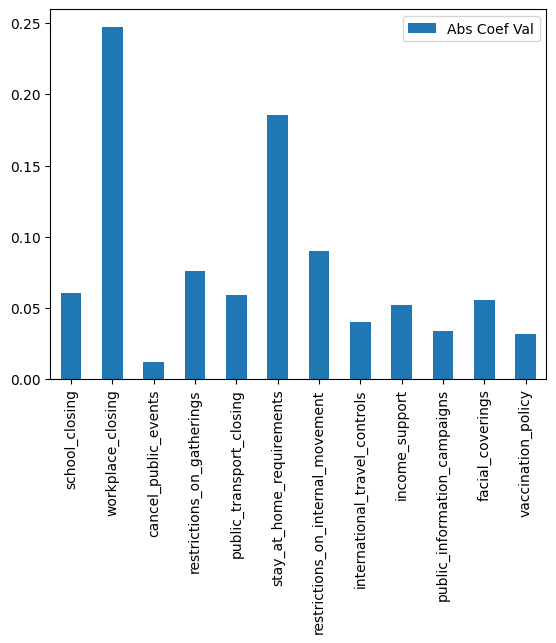

In [31]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

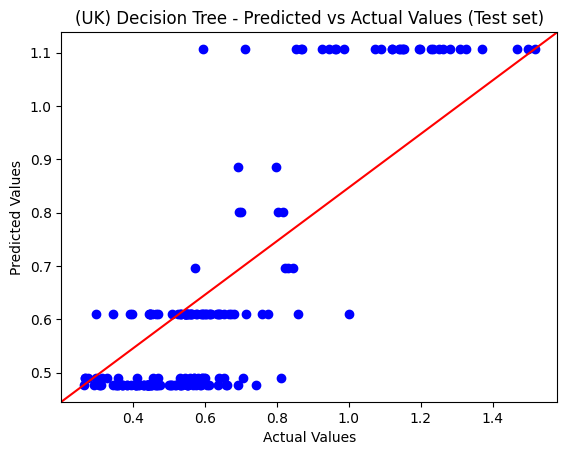

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][1], color = 'blue')
plt.title('(UK) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

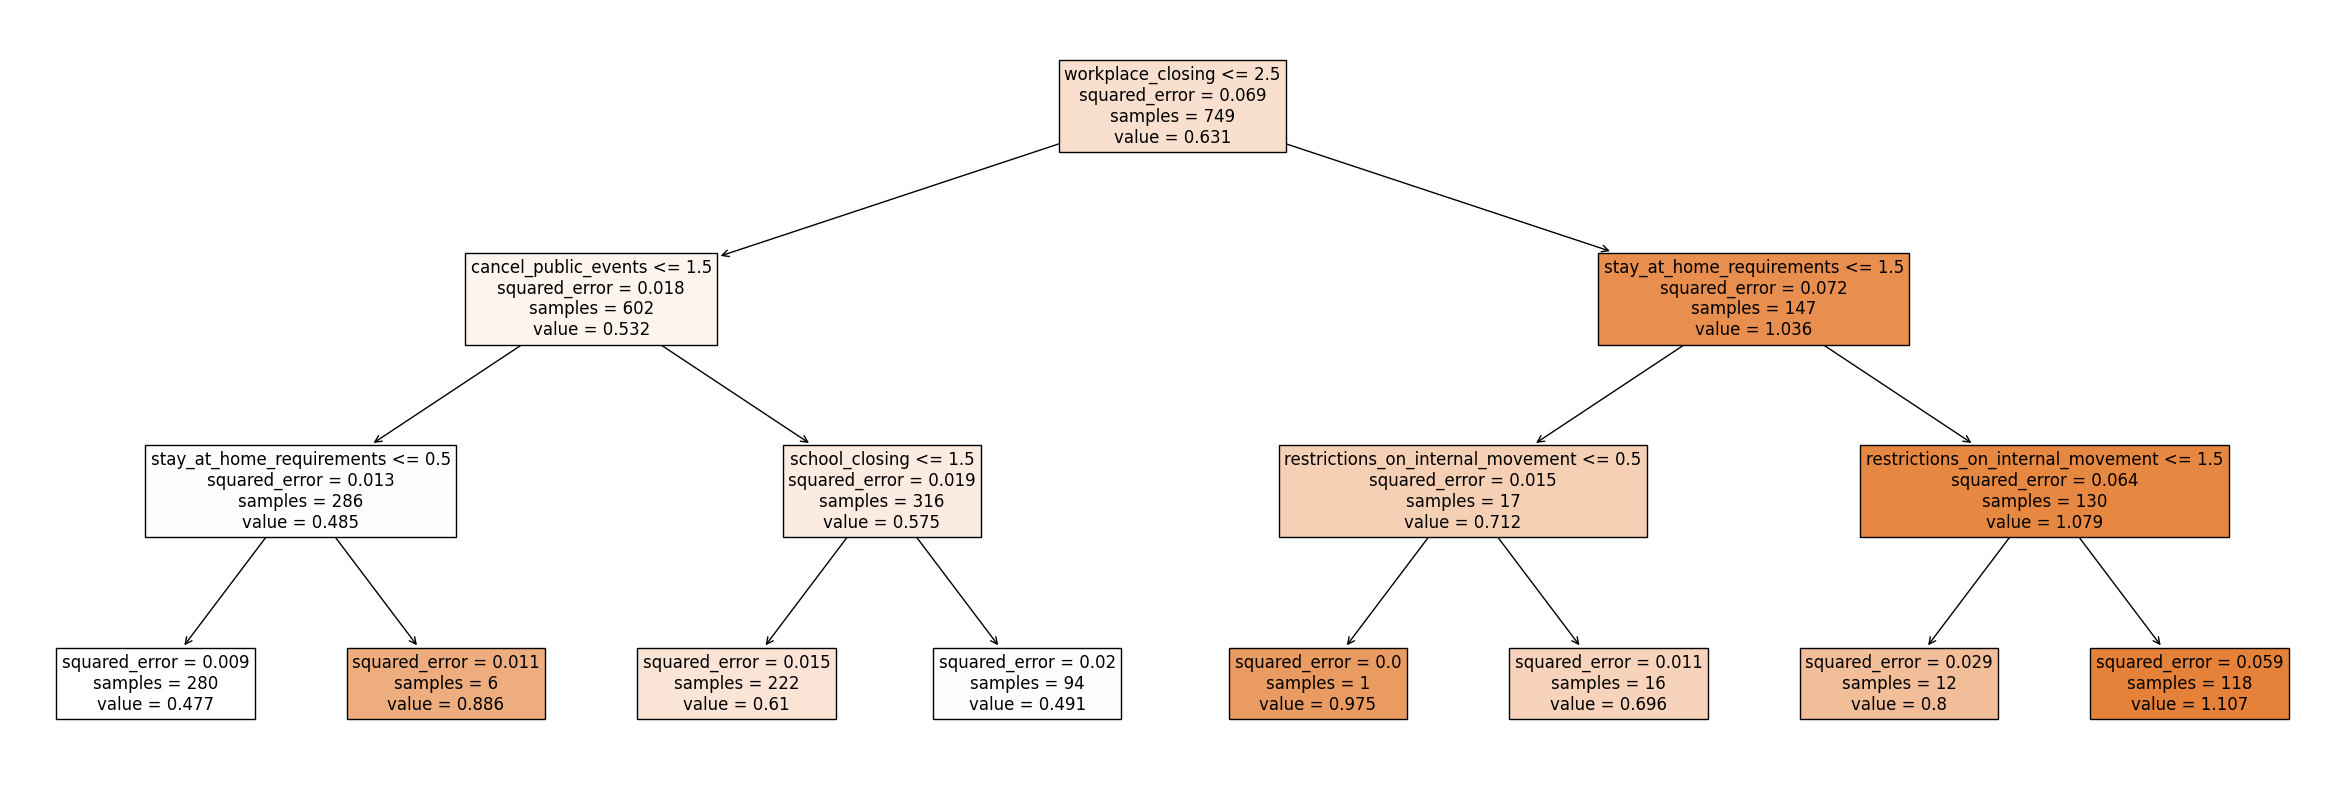

In [33]:
model = trained_models_gb["model"][1]

fig = plt.figure(figsize=(30, 10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)

### The Random Forest

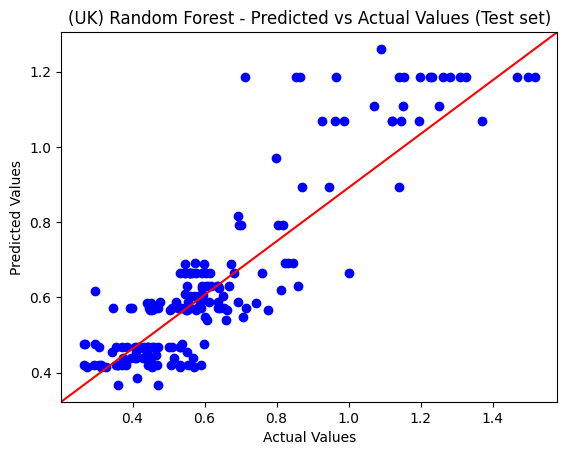

In [34]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][2], color = 'blue')
plt.title('(UK) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [35]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_gb["model"][2].feature_importances_,
    "feature_names" : trained_models_gb["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,0.022480,school_closing
1,0.473537,workplace_closing
2,0.031918,cancel_public_events
3,0.001668,restrictions_on_gatherings
4,0.002070,public_transport_closing
5,0.335014,stay_at_home_requirements
6,0.031647,restrictions_on_internal_movement
7,0.045254,international_travel_controls
8,0.006441,income_support
9,0.000215,public_information_campaigns


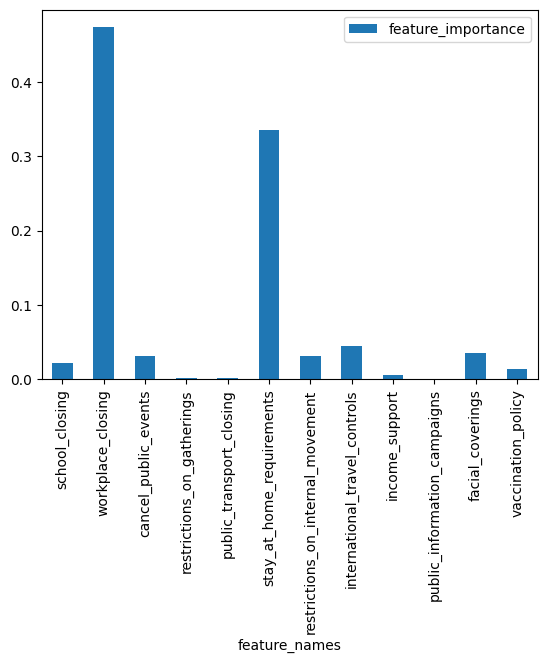

In [36]:
ax = df_temp.plot.bar(y='feature_importance', x = "feature_names", rot=90)

## Indonesia

In [37]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_id.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_id["independent"], 
                                                    test_size = 0.2, random_state =1)

In [39]:
trained_models_id = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_id["model"].append(model)
    trained_models_id["predicted_results"].append(y_pred)
    trained_models_id["train_score"].append(rmse_t)
    trained_models_id["test_score"].append(rmse)

In [40]:
for x in range(len(trained_models_id['model'])):
    print('Training Score for', trained_models_id['model'][x], ':', trained_models_id['train_score'][x])
    print('Testing Score for', trained_models_id['model'][x], ':', trained_models_id['test_score'][x])

Training Score for LinearRegression() : 0.16243991400234964
Testing Score for LinearRegression() : 0.15709062216948239
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.16879306411220266
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.16064241440848143
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.1246910143256026
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.10835743737609302


### The Linear Regression Model

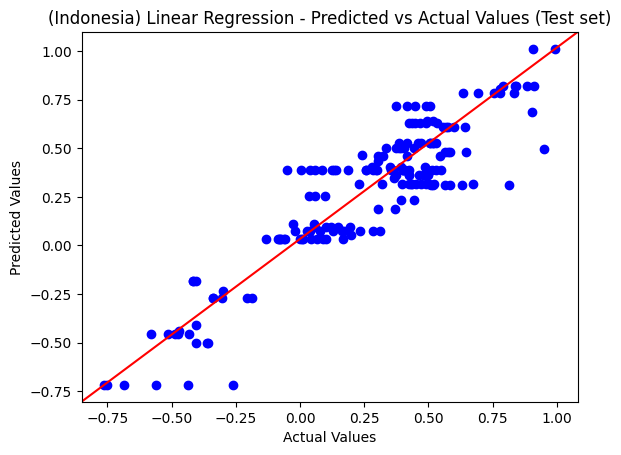

In [41]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][0], color = 'blue')
plt.title('(Indonesia) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [42]:
model_coefficients = trained_models_id["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                       Coef Val  Abs Coef Val
school_closing                     7.829370e-02  7.829370e-02
workplace_closing                  1.783808e-01  1.783808e-01
cancel_public_events               8.067537e-02  8.067537e-02
restrictions_on_gatherings         1.491153e-01  1.491153e-01
public_transport_closing           3.423994e-02  3.423994e-02
stay_at_home_requirements         -1.710149e-01  1.710149e-01
restrictions_on_internal_movement  1.910072e-01  1.910072e-01
international_travel_controls      3.009696e-02  3.009696e-02
income_support                    -2.630963e-01  2.630963e-01
public_information_campaigns       9.714451e-17  9.714451e-17
facial_coverings                  -1.197138e-01  1.197138e-01
vaccination_policy                -7.502418e-02  7.502418e-02


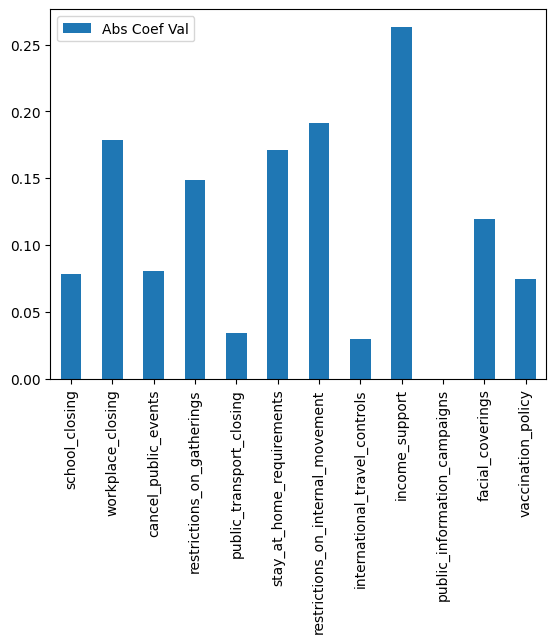

In [43]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

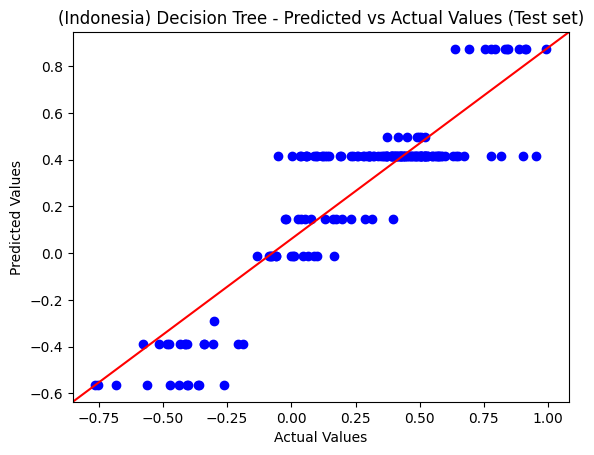

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][1], color = 'blue')
plt.title('(Indonesia) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

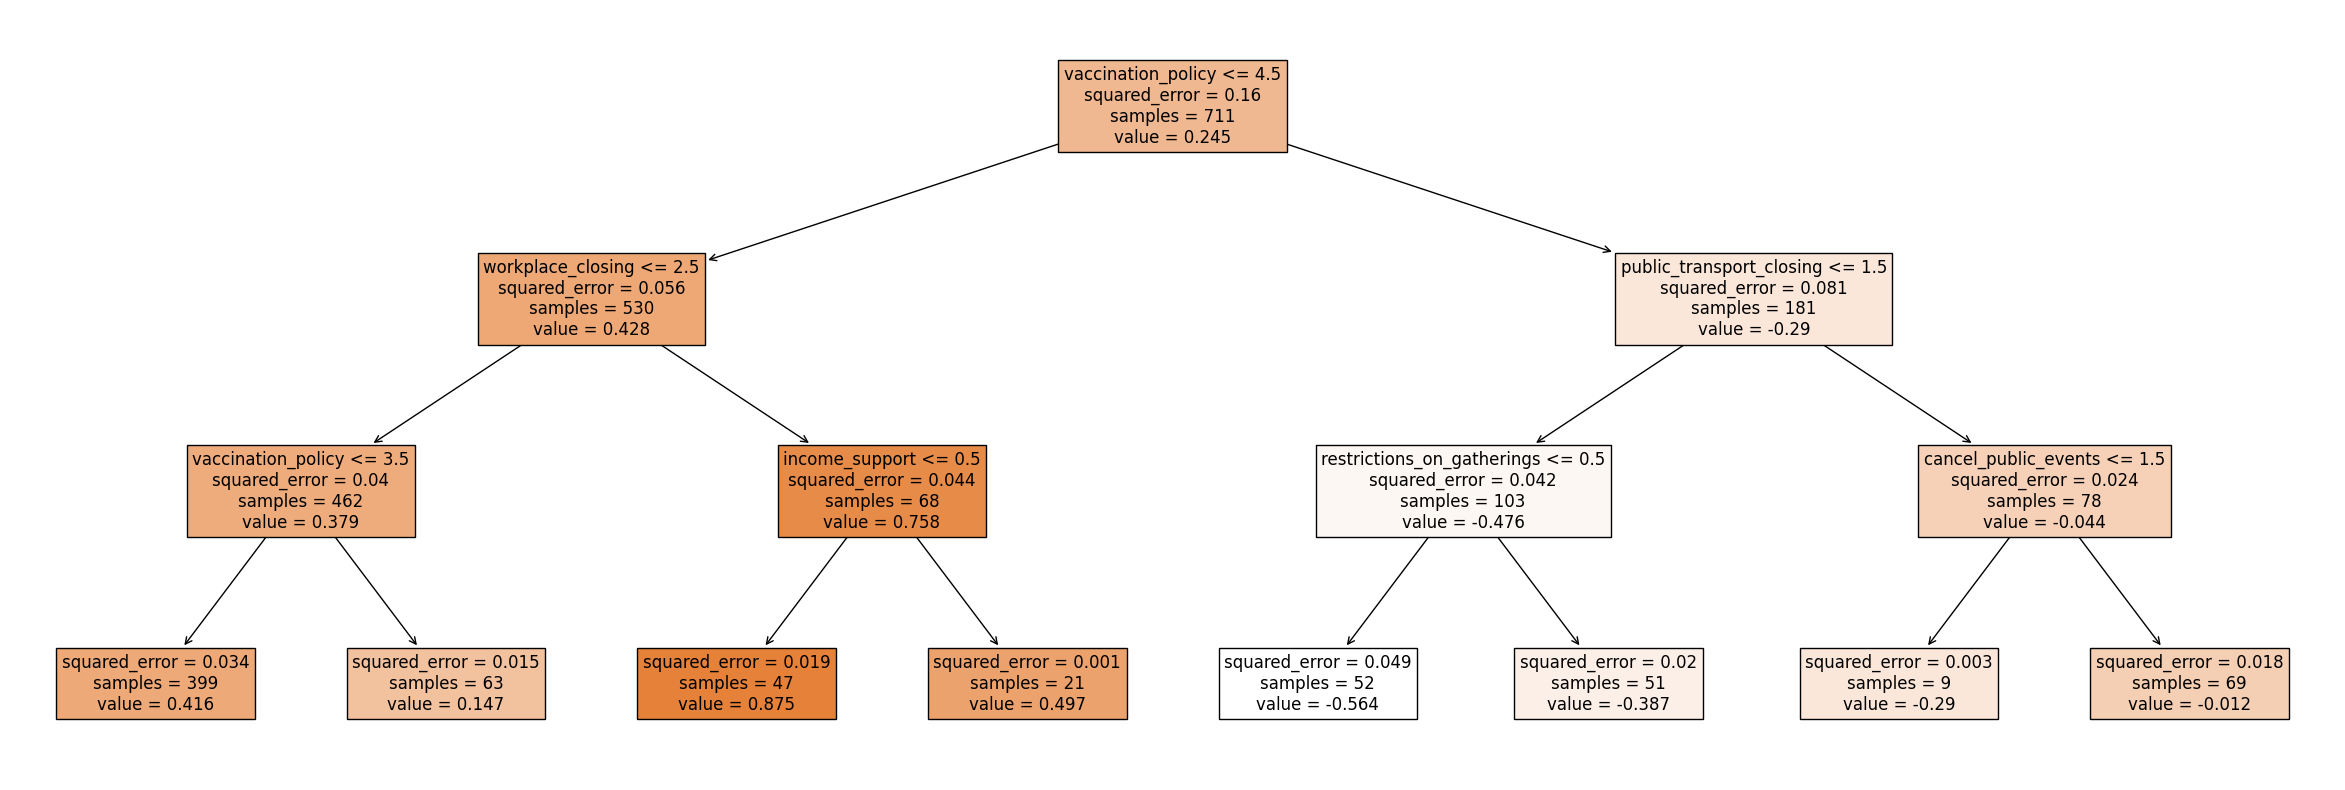

In [45]:
model = trained_models_id["model"][1]

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)

### The Random Forest

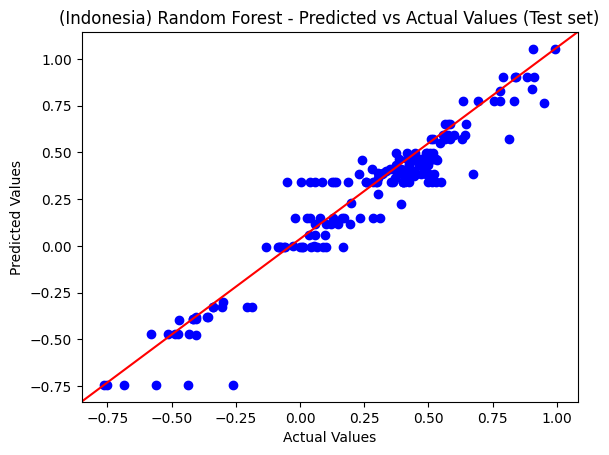

In [46]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][2], color = 'blue')
plt.title('(Indonesia) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [47]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_id["model"][2].feature_importances_,
    "feature_names" : trained_models_id["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,0.017732,school_closing
1,0.104679,workplace_closing
2,0.023244,cancel_public_events
3,0.008759,restrictions_on_gatherings
4,0.073285,public_transport_closing
5,0.007112,stay_at_home_requirements
6,0.005816,restrictions_on_internal_movement
7,0.026469,international_travel_controls
8,0.005258,income_support
9,0.000000,public_information_campaigns


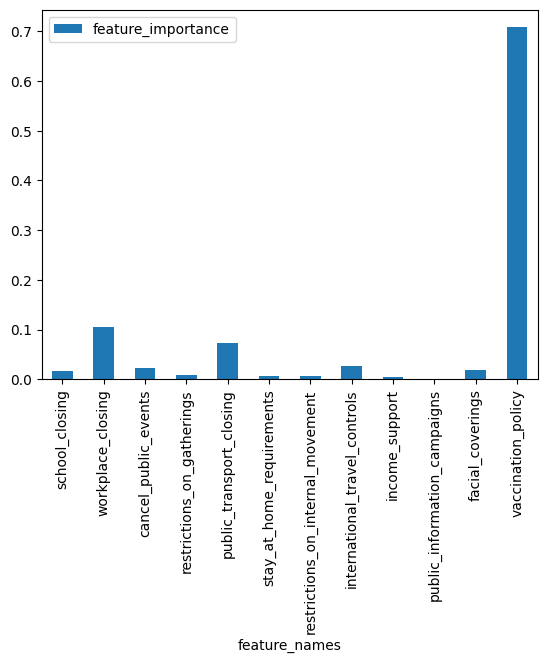

In [48]:
ax = df_temp.plot.bar(y='feature_importance', x = "feature_names", rot=90)

## Singapore

In [49]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_sg.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_sg["independent"], 
                                                    test_size = 0.2, random_state =1)

In [51]:
trained_models_sg = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_sg["model"].append(model)
    trained_models_sg["predicted_results"].append(y_pred)
    trained_models_sg["train_score"].append(rmse_t)
    trained_models_sg["test_score"].append(rmse)

In [52]:
for x in range(len(trained_models_sg['model'])):
    print('Training Score for', trained_models_sg['model'][x], ':', trained_models_sg['train_score'][x])
    print('Testing Score for', trained_models_sg['model'][x], ':', trained_models_sg['test_score'][x])

Training Score for LinearRegression() : 0.15459624377918404
Testing Score for LinearRegression() : 0.16864062659416376
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.159739429718733
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.17260412960663374
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.13641466166681396
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.14977088326624263


### The Linear Regression Model

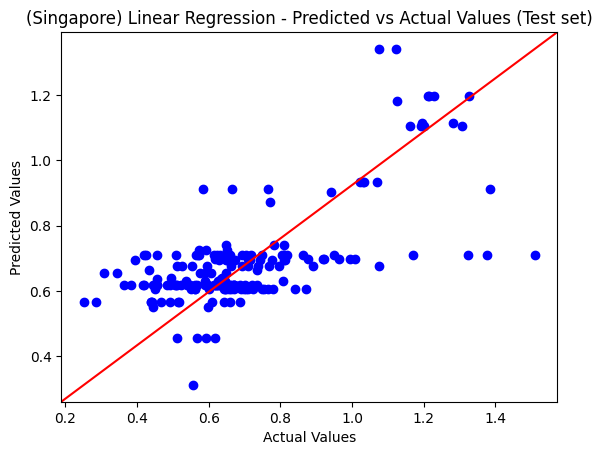

In [53]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][0], color = 'blue')
plt.title('(Singapore) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [54]:
model_coefficients = trained_models_sg["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                       Coef Val  Abs Coef Val
school_closing                     2.035450e-01  2.035450e-01
workplace_closing                  1.696131e-02  1.696131e-02
cancel_public_events              -1.495001e-02  1.495001e-02
restrictions_on_gatherings         1.752572e-02  1.752572e-02
public_transport_closing           3.156329e-15  3.156329e-15
stay_at_home_requirements         -7.467336e-01  7.467336e-01
restrictions_on_internal_movement  5.386110e-01  5.386110e-01
international_travel_controls      1.431244e-01  1.431244e-01
income_support                     1.609428e-01  1.609428e-01
public_information_campaigns       0.000000e+00  0.000000e+00
facial_coverings                   2.014976e-02  2.014976e-02
vaccination_policy                 1.094682e-02  1.094682e-02


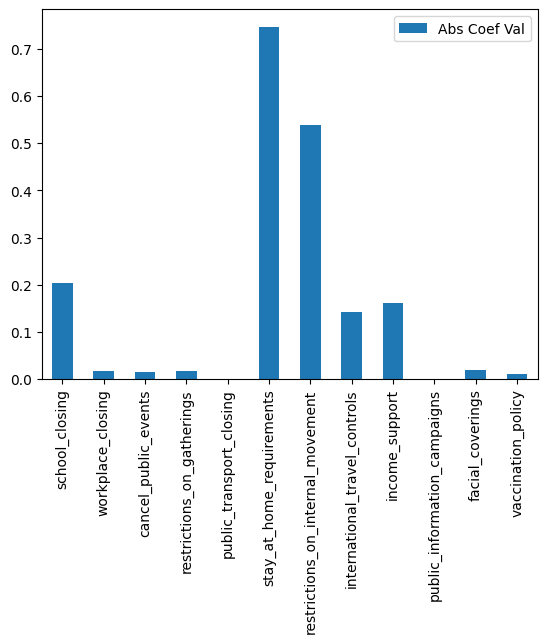

In [55]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

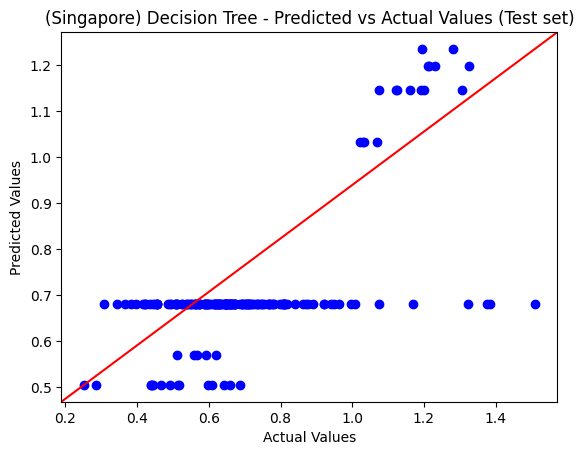

In [56]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][1], color = 'blue')
plt.title('(Singapore) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

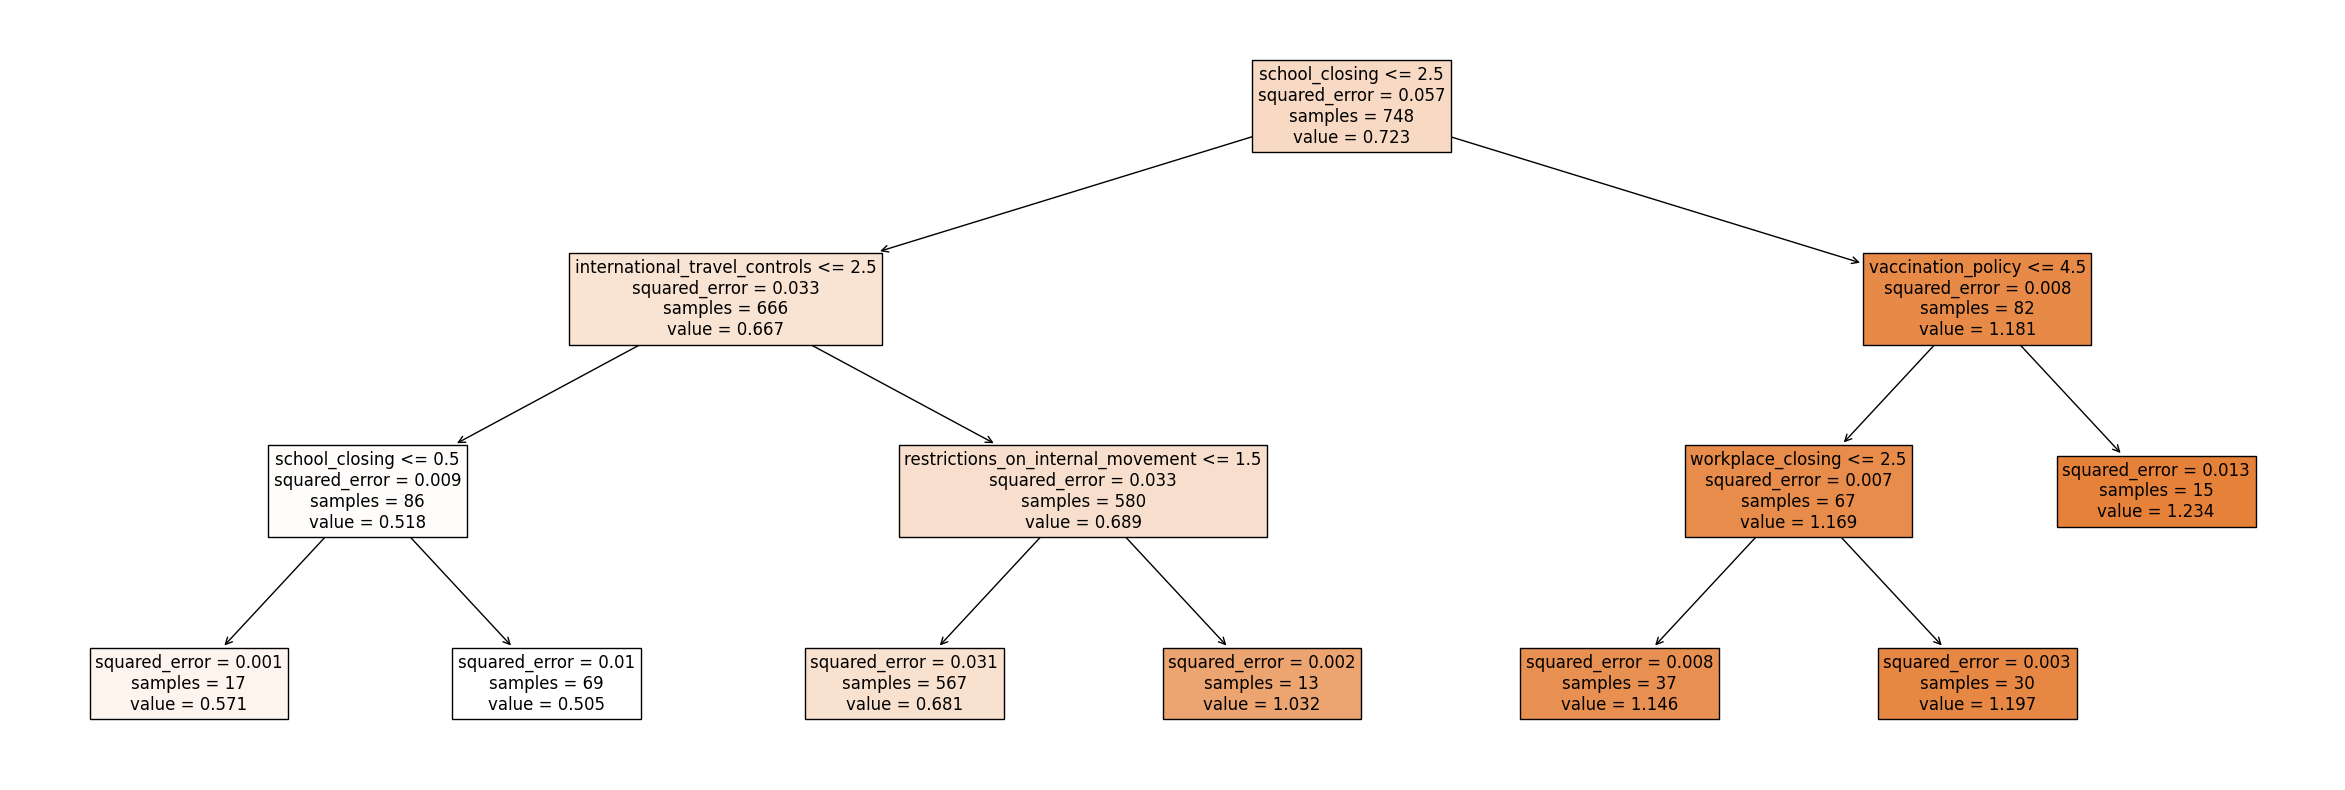

In [57]:
model = trained_models_sg["model"][1]

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)

### The Random Forest

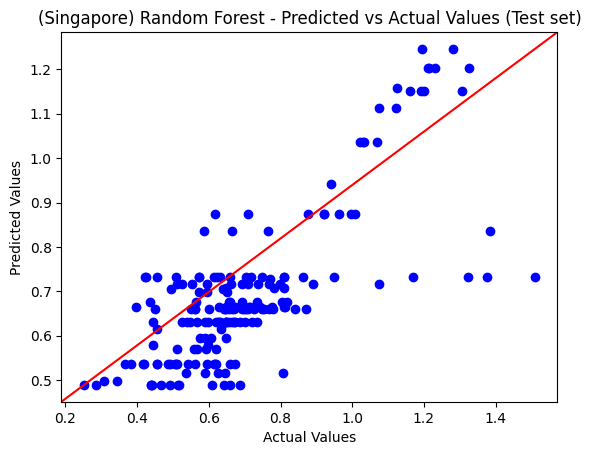

In [58]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][2], color = 'blue')
plt.title('(Singapore) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [59]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_sg["model"][2].feature_importances_,
    "feature_names" : trained_models_sg["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,0.727695,school_closing
1,0.008704,workplace_closing
2,0.031226,cancel_public_events
3,0.022032,restrictions_on_gatherings
4,0.000000,public_transport_closing
5,0.036210,stay_at_home_requirements
6,0.029032,restrictions_on_internal_movement
7,0.062256,international_travel_controls
8,0.004658,income_support
9,0.000000,public_information_campaigns


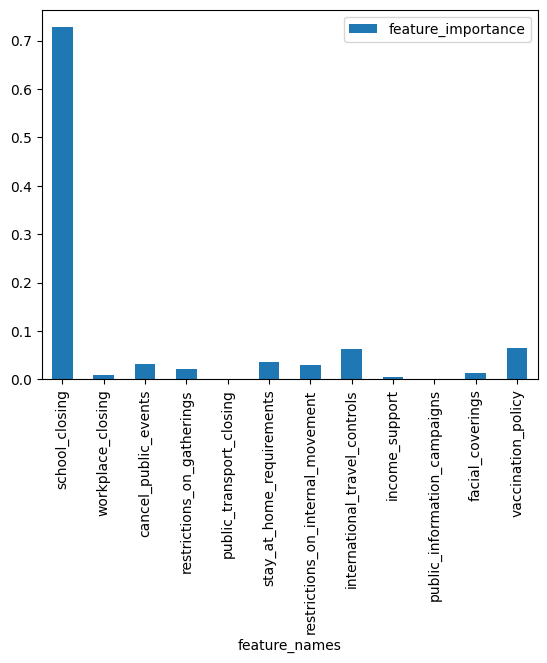

In [60]:
ax = df_temp.plot.bar(y='feature_importance', x = "feature_names", rot=90)

### Part 3: Which approach was more effective - Indirect Response

*Inirect Response: Whether these actions made an impact on covid deaths*

Independent variable 2 (indirect reponse) - covid deaths
Dependent variables - the reduced govt response dataset

Variables to select: perc_new_vacc - the number of new vaccinations as a percentage of the maximum

### Train model for part 3 - part 2

One model for each country

## England

In [61]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_gb.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_gb["perc_new_deaths"], 
                                                    test_size = 0.2, random_state =1)

In [63]:
trained_models_gb = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_gb["model"].append(model)
    trained_models_gb["predicted_results"].append(y_pred)
    trained_models_gb["train_score"].append(rmse_t)
    trained_models_gb["test_score"].append(rmse)

In [64]:
for x in range(len(trained_models_gb['model'])):
    print('Training Score for', trained_models_gb['model'][x], ':', trained_models_gb['train_score'][x])
    print('Testing Score for', trained_models_gb['model'][x], ':', trained_models_gb['test_score'][x])

Training Score for LinearRegression() : 0.13014958563780243
Testing Score for LinearRegression() : 0.14262002268170443
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.1069949768743437
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.12008467526687866
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.0870122708948663
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.10886405138453466


### The Linear Regression Model

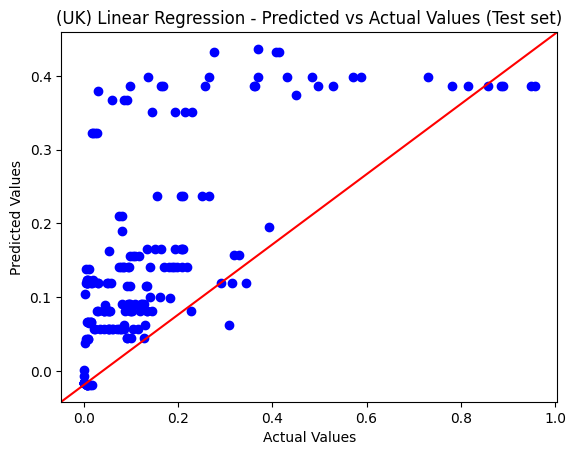

In [65]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][0], color = 'blue')
plt.title('(UK) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [66]:
model_coefficients = trained_models_gb["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                   Coef Val  Abs Coef Val
school_closing                     0.018909      0.018909
workplace_closing                  0.160973      0.160973
cancel_public_events              -0.119634      0.119634
restrictions_on_gatherings         0.011781      0.011781
public_transport_closing          -0.043013      0.043013
stay_at_home_requirements          0.080809      0.080809
restrictions_on_internal_movement  0.056928      0.056928
international_travel_controls     -0.050348      0.050348
income_support                    -0.082823      0.082823
public_information_campaigns      -0.008819      0.008819
facial_coverings                   0.033591      0.033591
vaccination_policy                 0.012589      0.012589


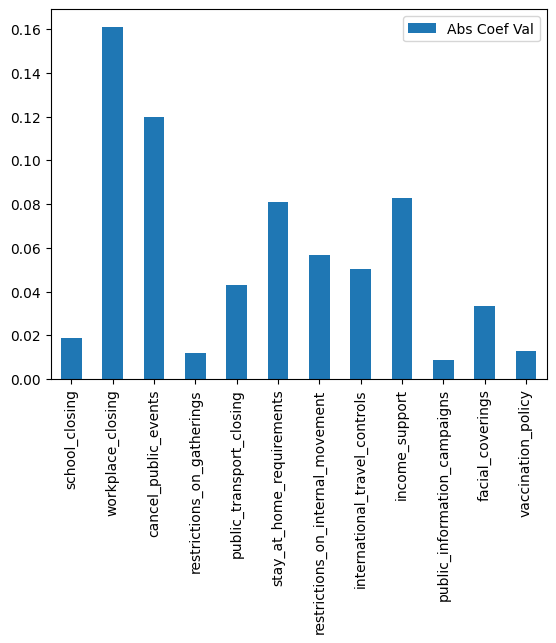

In [67]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

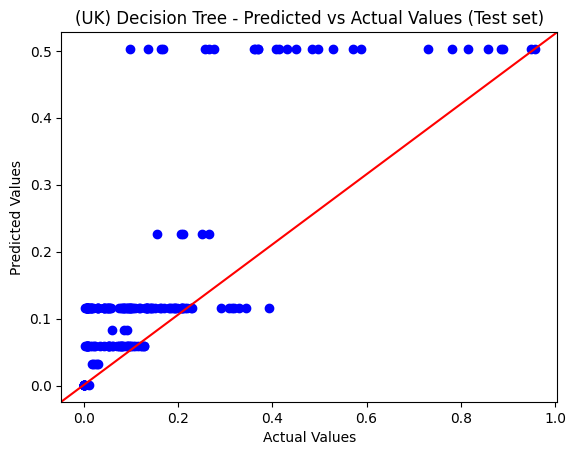

In [68]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][1], color = 'blue')
plt.title('(UK) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

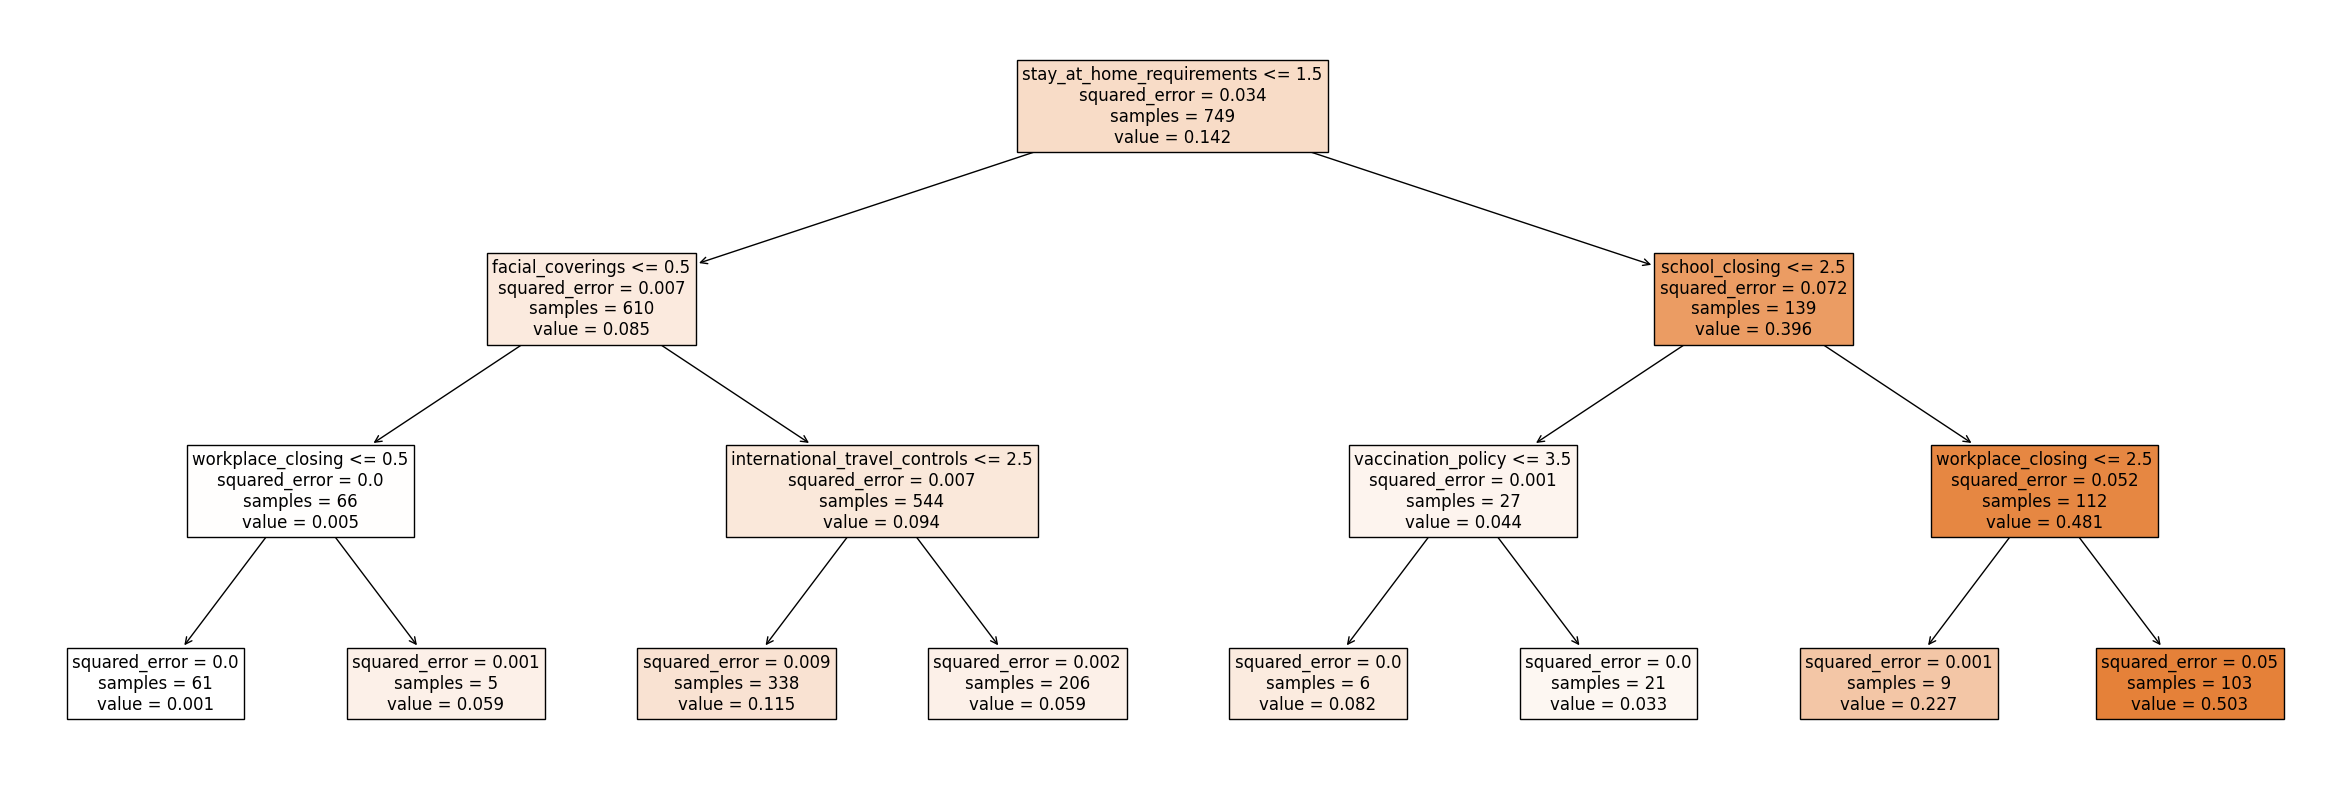

In [69]:
model = trained_models_gb["model"][1]

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)

### The Random Forest

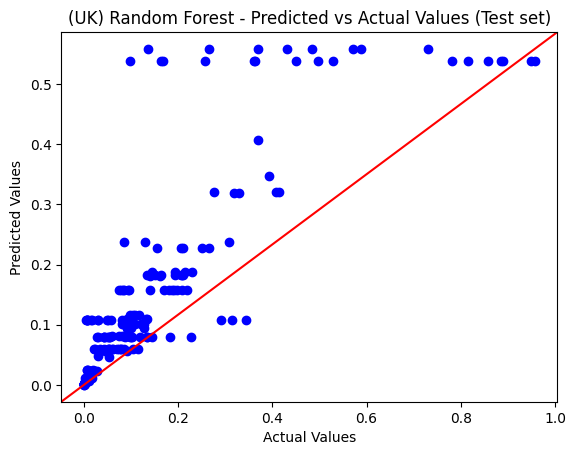

In [70]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_gb["predicted_results"][2], color = 'blue')
plt.title('(UK) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [71]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_gb["model"][2].feature_importances_,
    "feature_names" : trained_models_gb["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,2.213091e-01,school_closing
1,1.495894e-01,workplace_closing
2,2.657089e-04,cancel_public_events
3,1.463511e-02,restrictions_on_gatherings
4,4.662790e-05,public_transport_closing
5,4.769240e-01,stay_at_home_requirements
6,8.290569e-03,restrictions_on_internal_movement
7,5.178983e-02,international_travel_controls
8,7.835681e-04,income_support
9,5.691715e-07,public_information_campaigns


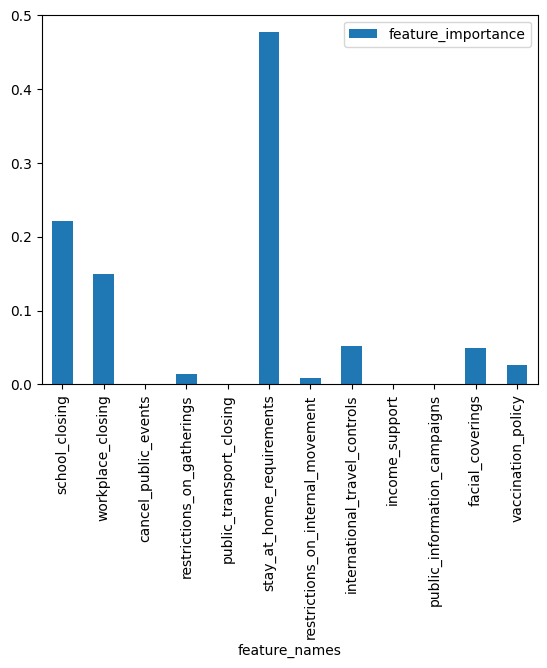

In [72]:
ax = df_temp.plot.bar(y='feature_importance', x = "feature_names", rot=90)

## Indonesia

In [73]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_id.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_id["perc_new_deaths"], 
                                                    test_size = 0.2, random_state =1)

In [75]:
trained_models_id = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_id["model"].append(model)
    trained_models_id["predicted_results"].append(y_pred)
    trained_models_id["train_score"].append(rmse_t)
    trained_models_id["test_score"].append(rmse)

In [76]:
for x in range(len(trained_models_id['model'])):
    print('Training Score for', trained_models_id['model'][x], ':', trained_models_id['train_score'][x])
    print('Testing Score for', trained_models_id['model'][x], ':', trained_models_id['test_score'][x])

Training Score for LinearRegression() : 0.12110715889482018
Testing Score for LinearRegression() : 0.12686399113313376
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.10872260979510173
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.08932638441097229
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.10272790250341675
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.08393730250663263


### The Linear Regression Model

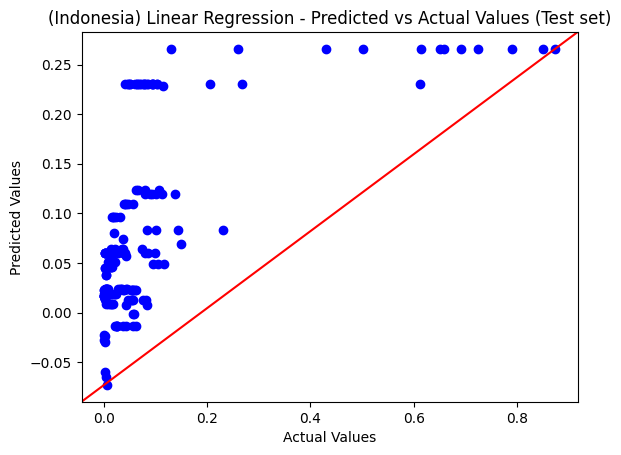

In [77]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][0], color = 'blue')
plt.title('(Indonesia) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [78]:
model_coefficients = trained_models_id["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                       Coef Val  Abs Coef Val
school_closing                     1.105786e-01  1.105786e-01
workplace_closing                 -5.077198e-02  5.077198e-02
cancel_public_events               2.972263e-03  2.972263e-03
restrictions_on_gatherings         1.853807e-02  1.853807e-02
public_transport_closing           5.243230e-03  5.243230e-03
stay_at_home_requirements          3.620886e-02  3.620886e-02
restrictions_on_internal_movement -1.296001e-02  1.296001e-02
international_travel_controls     -3.733609e-02  3.733609e-02
income_support                     3.340531e-02  3.340531e-02
public_information_campaigns      -1.387779e-17  1.387779e-17
facial_coverings                   1.979001e-02  1.979001e-02
vaccination_policy                 3.536053e-02  3.536053e-02


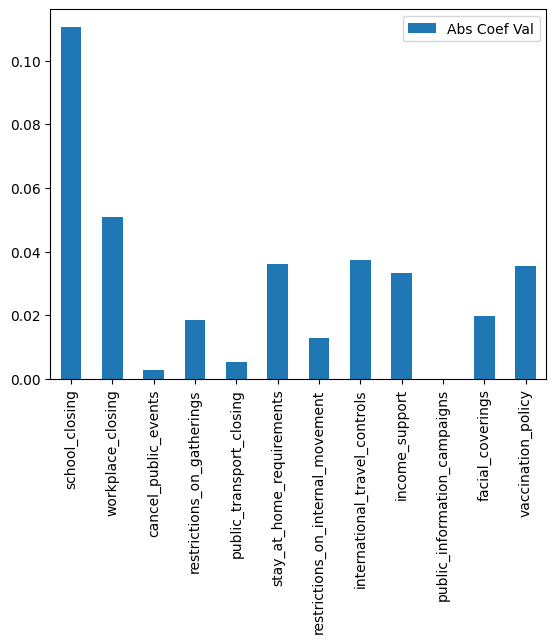

In [79]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

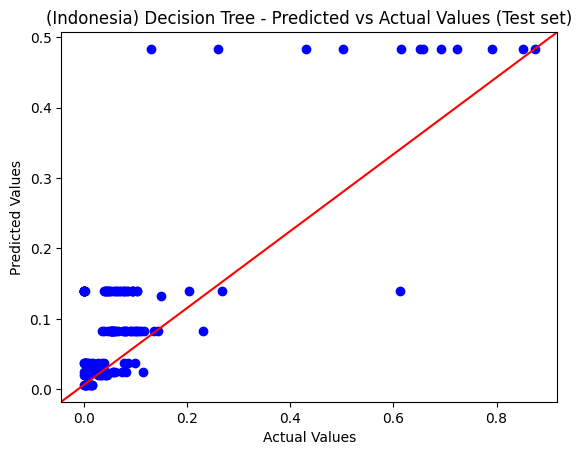

In [80]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][1], color = 'blue')
plt.title('(Indonesia) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

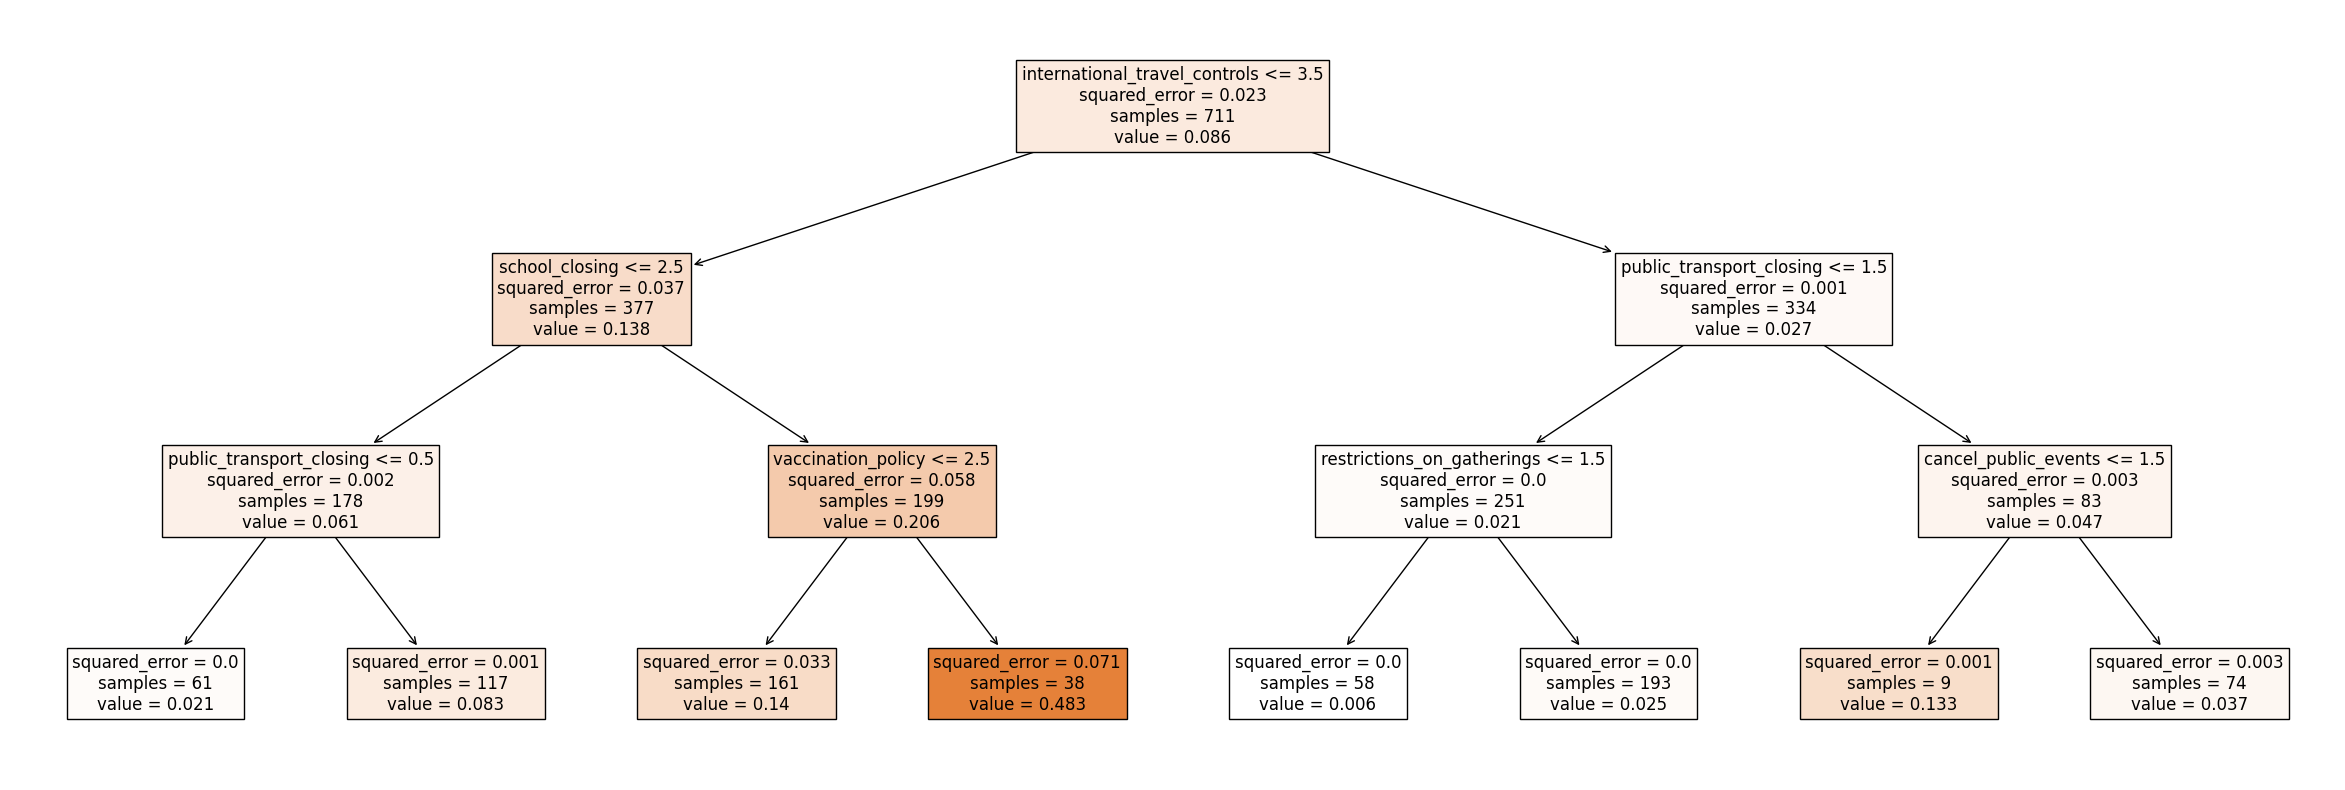

In [81]:
model = trained_models_id["model"][1]

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)

### The Random Forest

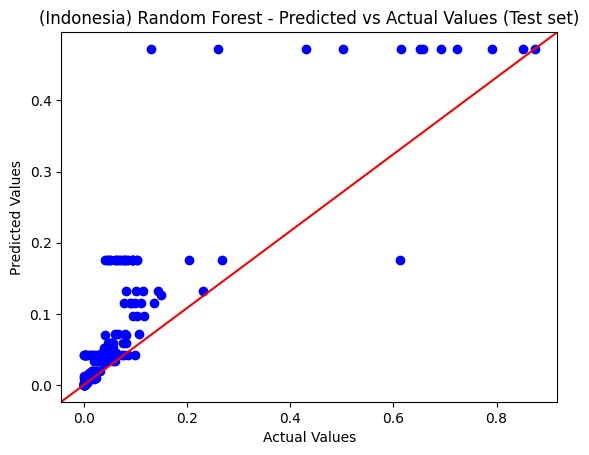

In [82]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_id["predicted_results"][2], color = 'blue')
plt.title('(Indonesia) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [83]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_id["model"][2].feature_importances_,
    "feature_names" : trained_models_id["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,0.141754,school_closing
1,0.004831,workplace_closing
2,0.007785,cancel_public_events
3,0.006339,restrictions_on_gatherings
4,0.058380,public_transport_closing
5,0.076210,stay_at_home_requirements
6,0.050837,restrictions_on_internal_movement
7,0.226684,international_travel_controls
8,0.002578,income_support
9,0.000000,public_information_campaigns


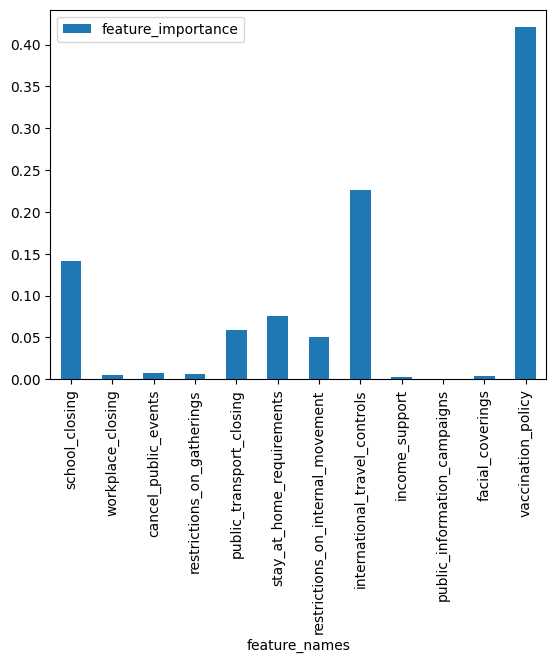

In [84]:
ax = df_temp.plot.bar(y='feature_importance', x = "feature_names", rot=90)

## Singapore

In [85]:
# Instantiate models
linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=3, random_state = 1)
random_forest = RandomForestRegressor(n_estimators = 10, random_state=1)

models = [linear_reg, decision_tree, random_forest]

In [86]:
x_train, x_test, y_train, y_test = train_test_split(df_part3_sg.drop(['location_key', 'independent', 'perc_new_deaths'], axis = 1), 
                                                    df_part3_sg["perc_new_deaths"], 
                                                    test_size = 0.2, random_state =1)

In [87]:
trained_models_sg = {"model" : [], "predicted_results" : [], "train_score": [], "test_score": []}

for model in models :
    model.fit(x_train, y_train)
    y_pred_t = model.predict(x_train)
    mse_t = mean_squared_error(y_train, y_pred_t)
    rmse_t = np.sqrt(mse_t)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    trained_models_sg["model"].append(model)
    trained_models_sg["predicted_results"].append(y_pred)
    trained_models_sg["train_score"].append(rmse_t)
    trained_models_sg["test_score"].append(rmse)

In [88]:
for x in range(len(trained_models_sg['model'])):
    print('Training Score for', trained_models_sg['model'][x], ':', trained_models_sg['train_score'][x])
    print('Testing Score for', trained_models_sg['model'][x], ':', trained_models_sg['test_score'][x])

Training Score for LinearRegression() : 0.14184460815312291
Testing Score for LinearRegression() : 0.1429956669366087
Training Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.12621962000884837
Testing Score for DecisionTreeRegressor(max_depth=3, random_state=1) : 0.12982899973370524
Training Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.11254097022567053
Testing Score for RandomForestRegressor(n_estimators=10, random_state=1) : 0.1194036442098561


### The Linear Regression Model

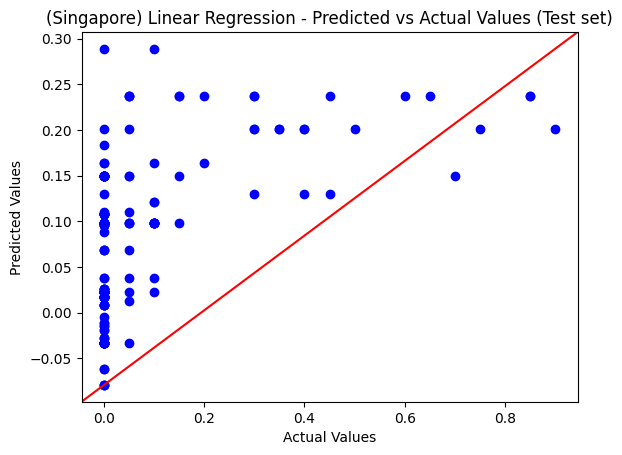

In [89]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][0], color = 'blue')
plt.title('(Singapore) Linear Regression - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()


In [90]:
model_coefficients = trained_models_sg["model"][0].coef_
feature_names = x_train.columns
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coef Val'])
coefficients_df['Abs Coef Val'] = abs(coefficients_df['Coef Val'])
print(coefficients_df)

                                       Coef Val  Abs Coef Val
school_closing                    -1.978446e-02  1.978446e-02
workplace_closing                  4.247563e-02  4.247563e-02
cancel_public_events               5.105278e-02  5.105278e-02
restrictions_on_gatherings        -1.405866e-02  1.405866e-02
public_transport_closing           4.857226e-16  4.857226e-16
stay_at_home_requirements         -1.265131e-01  1.265131e-01
restrictions_on_internal_movement  6.733648e-02  6.733648e-02
international_travel_controls     -8.776210e-02  8.776210e-02
income_support                    -9.837831e-03  9.837831e-03
public_information_campaigns       0.000000e+00  0.000000e+00
facial_coverings                   1.884249e-02  1.884249e-02
vaccination_policy                 4.240812e-02  4.240812e-02


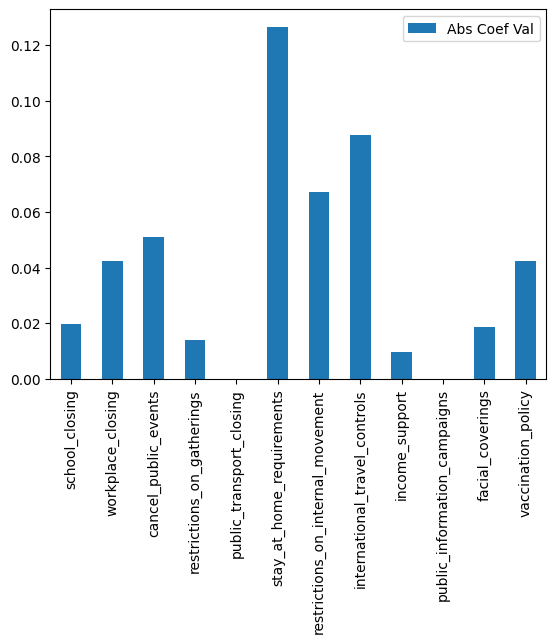

In [91]:
ax = coefficients_df.plot.bar(y='Abs Coef Val', rot=90)

### The Decision Tree

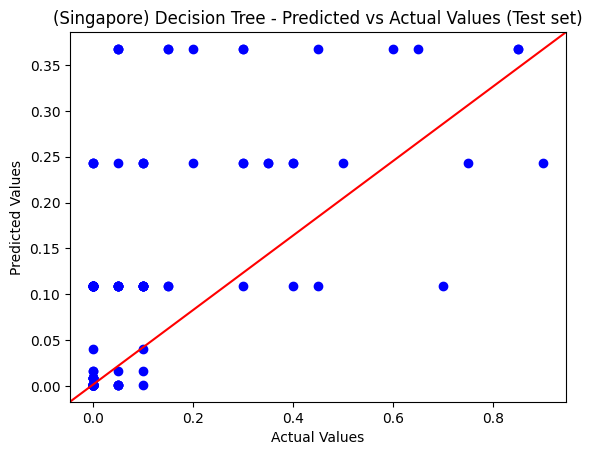

In [92]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][1], color = 'blue')
plt.title('(Singapore) Decision Tree - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

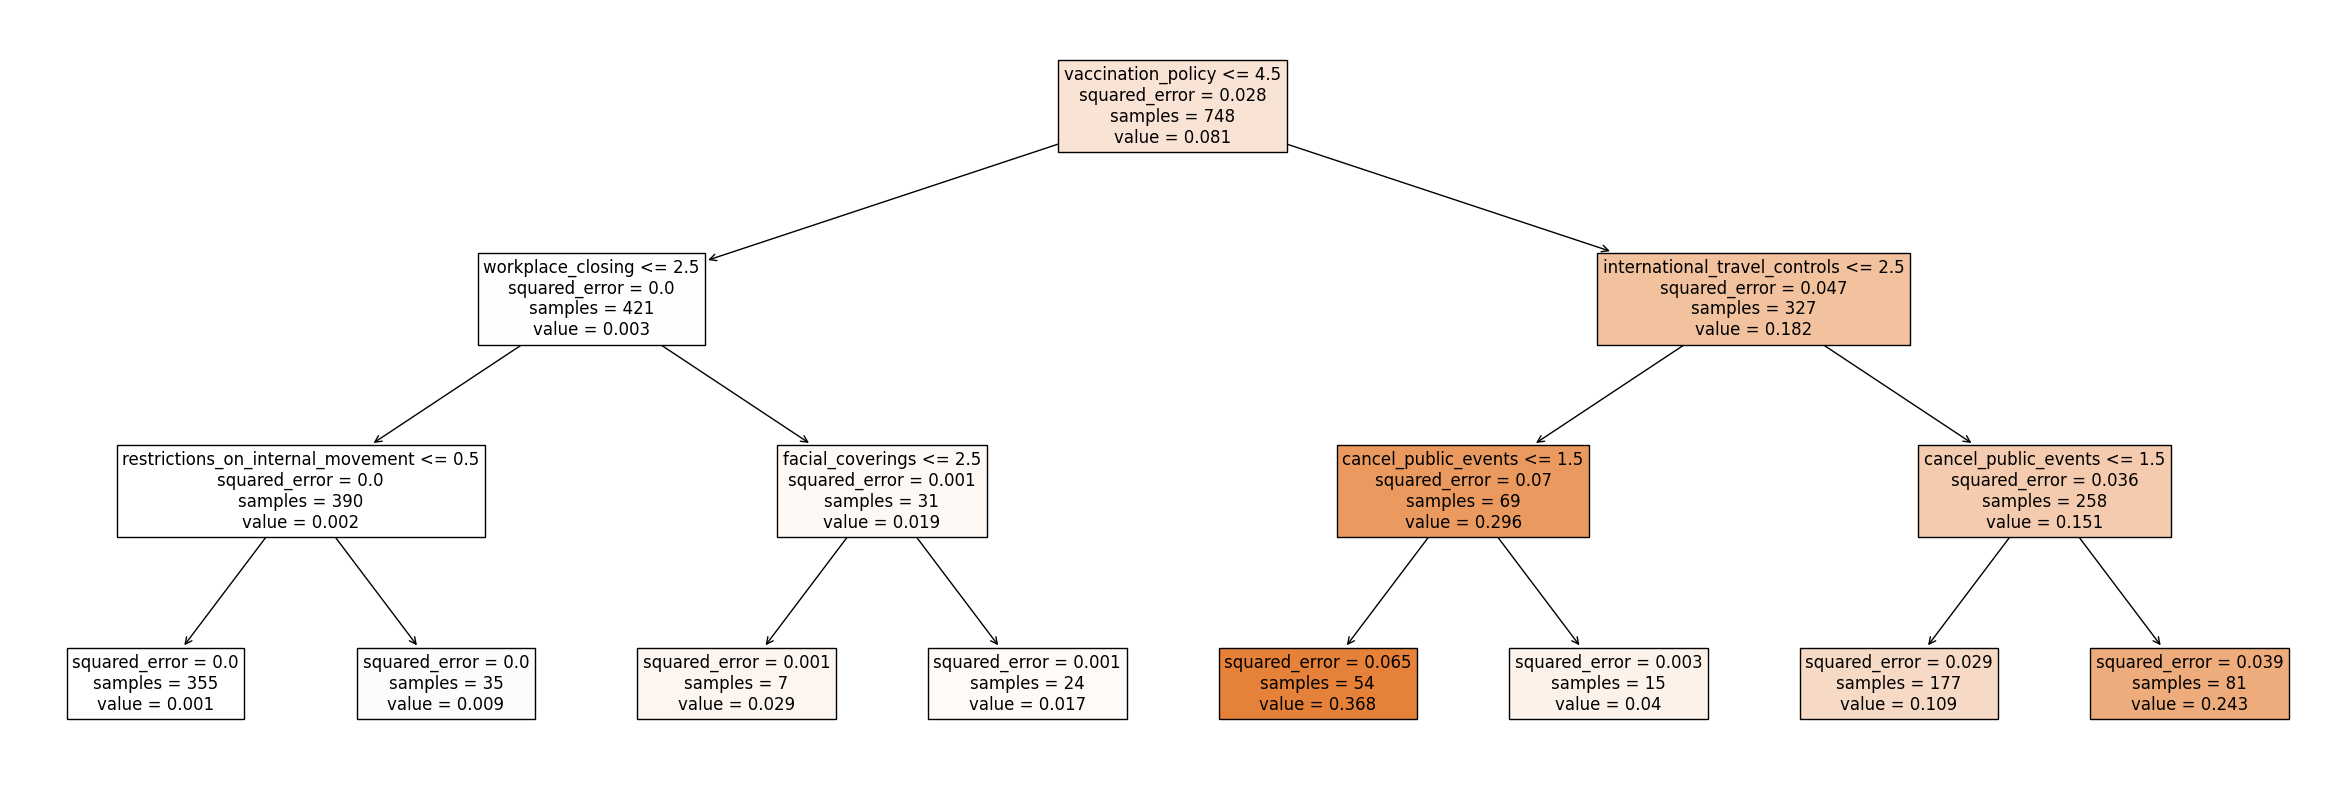

In [93]:
model = trained_models_sg["model"][1]

fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize = 12)

### The Random Forest

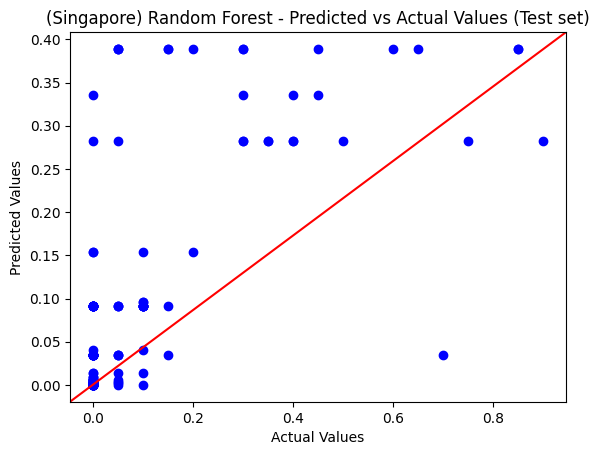

In [94]:
fig, ax = plt.subplots()
ax.scatter(y_test, trained_models_sg["predicted_results"][2], color = 'blue')
plt.title('(Singapore) Random Forest - Predicted vs Actual Values (Test set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
ax.plot([0,1],[0,1], transform=ax.transAxes, color = 'red')
plt.show()

In [95]:
df_temp = pd.DataFrame(
    {"feature_importance" : trained_models_sg["model"][2].feature_importances_,
    "feature_names" : trained_models_sg["model"][2].feature_names_in_})

df_temp

,feature_importance,feature_names
0,0.155606,school_closing
1,0.013787,workplace_closing
2,0.205955,cancel_public_events
3,0.000117,restrictions_on_gatherings
4,0.000000,public_transport_closing
5,0.000090,stay_at_home_requirements
6,0.000229,restrictions_on_internal_movement
7,0.115867,international_travel_controls
8,0.000222,income_support
9,0.000000,public_information_campaigns


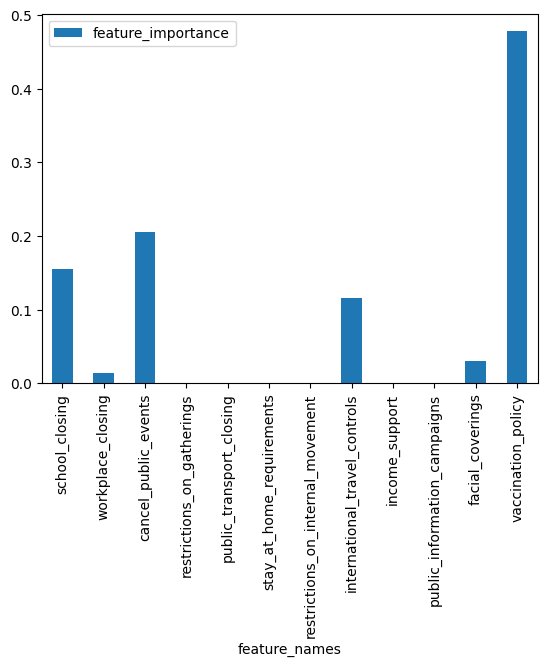

In [96]:
ax = df_temp.plot.bar(y='feature_importance', x = "feature_names", rot=90)